In [1]:
# k means 问题：需要手动指定 K 值，需要多次测试找到最优 K 值
# 自底向上层次聚类法：Agglomerative Clustering


# 对于数据集 D，D = (x1,x2,.....xn) ：
# 1.将数据集中每个样本标记为 1 类，即 D 初始时包含的类别（Class）为 C = (c1,c2....cn) 。
# 2.计算并找出 C 中距离最近的 2 个类别，合并为 1 类。
# 3.依次合并直到最后仅剩下一个列表，即建立起一颗完整的层次树。

# 距离计算
# 单连接：根据两种类别之间最近的元素间距离作为两类别之间的距离
# 全连接：根据两种类别之间最远的元素间距离作为两类别之间的距离
# 平均连接：依次计算两种类别之间两两元素间距离，并最终求得平均值作为两类别之间的距离。
# 中心连接：平均连接虽然看起来更加合理，但是两两元素间的距离计算量往往非常庞大。有时候，也可以使用中心连接计算方法。即先计算类别中心，再以中心连线作为两类别之间的距离
# 「单连接」和「全连接」都相对极端，容易受到噪声点和分布不均匀数据造成的干扰


In [2]:
from sklearn import datasets

# 生成 10 个二维的数据，有两个中心点，data 同时包含点数据和分类数据
data = datasets.make_blobs(10, n_features=2, centers=2, random_state=10)

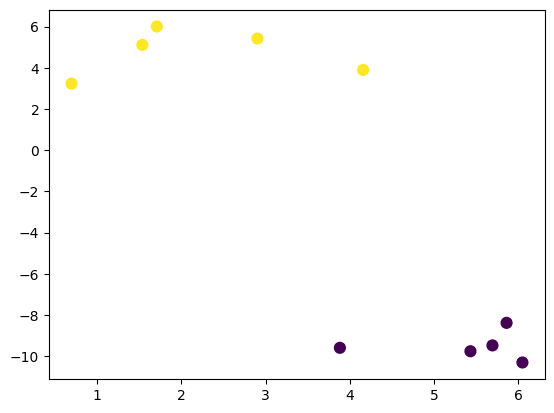

In [3]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1], s=60)

In [4]:
import numpy as np


def euclidean_distance(a, b):
    """
    参数:
    a -- 数组 a
    b -- 数组 b

    返回:
    dist -- a, b 间欧式距离
    """
    # 欧式距离
    x = float(a[0]) - float(b[0])
    x = x * x
    y = float(a[1]) - float(b[1])
    y = y * y
    dist = round(np.sqrt(x + y), 2)
    return dist

In [ ]:
# 自底向上层次聚类
def agglomerative_clustering(data):
    # Agglomerative 聚类计算过程

    while len(data) > 1:
        print("☞ 第 {} 次迭代\n".format(10 - len(data) + 1))
        min_distance = float("inf")  # 设定初始距离为无穷大
        
        # 找到最近的两个点,并以他们的中心作为此类与其他类的距离,中心连接
        for i in range(len(data)):
            print("---")
            for j in range(i + 1, len(data)):
                distance = euclidean_distance(data[i], data[j])
                print("计算 {} 与 {} 距离为 {}".format(data[i], data[j], distance))
                if distance < min_distance:
                    min_distance = distance
                    min_ij = (i, j)
        i, j = min_ij  # 最近数据点序号
        data1 = data[i]
        data2 = data[j]
        data = np.delete(data, j, 0)  # 删除原数据
        data = np.delete(data, i, 0)  # 删除原数据

        # 最近两个点的中心点
        b = np.atleast_2d(
            [(data1[0] + data2[0]) / 2, (data1[1] + data2[1]) / 2]
        )  # 计算两点新中心
        data = np.concatenate((data, b), axis=0)  # 将新数据点添加到迭代过程
        print("\n最近距离:{} & {} = {}, 合并后中心:{}\n".format(data1, data2, min_distance, b))

    return data

# data[0] 去除点数据
agglomerative_clustering(data[0])
# 基于聚类结果构造数，即可快速得到不同 k 值的聚类结果

In [5]:
# sklearn.cluster.AgglomerativeClustering(n_clusters=2, metric='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', pooling_func=<function mean>)

# n_clusters: 表示最终要查找类别的数量，例如上面的 2 类。

# metric: 有 euclidean（欧式距离）, l1（L1 范数）, l2（L2 范数）, manhattan（曼哈顿距离）等可选。

# linkage: 连接方法：ward（单连接）, complete（全连接）, average（平均连接）可选。

In [6]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="average")
model.fit_predict(data[0])

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [7]:
# 自顶向下层次聚类法：比自底向上复杂

# 利用 k means 实现
# 1.把数据集 D 归为单个类别 C 作为顶层。
# 2.使用 K-Means 算法把 C 划分成 2 个子类别，构成子层；
# 3.递归使用 K-Means 算法，分别对划分的子类，继续进行 2 类 划分子层直到每个点都是单独分类或特定条件结束

# 利用平均距离进行分割

# 1.把数据集 D 归为单个类别 C 作为顶层。
# 2.从类别 C 中取出点 d，使得 d 满足到 C 中其他点的平均距离最远，构成类别 N。
# 3.继续从类别 C 中取出点 d1， 使得 d1 满足到 C 中其他点的平均距离与到 N 中点的平均距离之间的差值最大，并将点放入 N。
# 4.重复步骤 3，直到差值为负数。(直到点 d1 远离 N 类，接近 C 类)
# 5.再从子类中重复步骤 2，3，4 直到全部点单独成类，即完成分割。
# 自顶向下层次聚类法在实施过程中常常遇到一个问题，那就是如果两个样本在上一步聚类中被划分成不同的类别，那么即使这两个点距离非常近，后面也不会被放到一类中。
# 在实际应用中，自顶向下层次聚类法没有自底而上的层次聚类法常用


In [ ]:
# BIRCH 聚类算法
# Balanced Iterative Reducing and Clustering using Hierarchies，直译过来就是「使用层次方法的平衡迭代规约和聚类」，该算法由时任 IBM 工程师 Tian Zhang 于 1996 年发明。
# 优点：效率高，可用于大型数据集的快速聚类
# 原理：基于训练样本建立了 CF 聚类特征树。CF 聚类特征树对应的输出就是若干个 CF 节点，每个节点里的样本点就是一个聚类的类别

# BIRCH 算法在建立 CF 特征树时只存储原始数据的特征信息，并不需要存储原始数据信息，内存开销上更优，计算高效。
# BIRCH 算法只需要遍历一遍原始数据，而 Agglomerative 算法在每次迭代都需要遍历一遍数据，再次突出 BIRCH 的高效性。
# BIRCH 属于在线学习算法，并支持对流数据的聚类，开始聚类时并不需要知道所有的数据。

# CF 聚类特征：对特征数据进行运算并且以元组的形式记录，定义类别（簇）的信息，并有效地对数据进行压缩
# CF = (N,LS,SS)
# N: 表示该 CF 中拥有的样本点的数量；  
# LS: 表示该 CF 中拥有的样本点各特征维度的和向量；  所有点各维度间各自相加（结果是向量）
# SS: 表示该 CF 中拥有的样本点各特征维度的平方和；  所有点维度值平方总和（结果是值）
# CF 拥有可进行加法运算

# CF Tree 聚类特征树
# 枝平衡因子 β、叶平衡因子 λ 和空间阈值 t
# 非叶节点包含多个子节点，不少于 β 个

In [ ]:
# load_digits

# 参数
# images：8x8 矩阵，记录每张手写字符图像对应的像素灰度值

# data：将 images 对应的 8x8 矩阵转换为行向量

# target：记录 1797 张影像各自代表的数字

In [ ]:
digits = datasets.load_digits()

# 查看前 5 个字符
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, image in enumerate(digits.images[:5]):
    axes[i].imshow(image, cmap=plt.cm.gray_r)

    digits.images[0]
    # 升维转化：对矩阵进行扁平化处理,可以转化为高维向量，在聚类时直接计算距离
    # - 8 x 8 -> 1 x 64
    # - 问题：难以在图像上绘制出来
    # 降维转化：PCA 主成分分析
    # - 1 x 64 -> 1 x 2?

In [ ]:
# PCA 主成分分析 Principal Components Analysis
# 降低数据的维数，通过保留数据集中的主要成分来简化数据集
# 数学原理：通过对协方差矩阵进行特征分解，从而得出主成分（特征向量）与对应的权值（特征值）。然后剔除那些较小特征值（较小权值）对应的特征，从而达到降低数据维数的目的。

# 作用
# 1.方便将数据用于低维空间可视化。聚类过程中的可视化是很有必要的。
# 2.高维度数据集往往就意味着计算资源的大量消耗。通过对数据进行降维，我们就能在不较大影响结果的同时，减少模型学习时间。



In [ ]:
# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver='auto')

# n_components= 表示需要保留主成分（特征）的数量。

# copy= 表示针对原始数据降维还是针对原始数据副本降维。当参数为 False 时，降维后的原始数据会发生改变，这里默认为 True。

# whiten= 白化表示将特征之间的相关性降低，并使得每个特征具有相同的方差。

# svd_solver= 表示奇异值分解 SVD 的方法。有 4 参数，分别是：auto, full, arpack, randomized。


In [ ]:
# PCA 将数据降为 2 维

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(digits.data)
pca_data

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1])

In [ ]:
# Birch 聚类

# sklearn.cluster.Birch(threshold=0.5, branching_factor=50, n_clusters=3, compute_labels=True, copy=True)

# threshold: 每个 CF 的空间阈值 
# 。参数值越小，则 CF 特征树的规模会越大，学习时花费的时间和内存会越多。默认值是 0.5，但如果样本的方差较大，则一般需要增大这个默认值。

# branching_factor: CF 树中所有节点的最大 CF 数。该参数默认为 50，如果样本量非常大，一般需要增大这个默认值。

# n_clusters: 虽然层次聚类无需预先设定类别数量，但可以设定期望查询的类别数。

In [ ]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=10)
cluster_pca = birch.fit_predict(pca_data)
cluster_pca

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_pca)

In [ ]:
# 绘制聚类边界

# 计算聚类过程中的决策边界
x_min, x_max = pca_data[:, 0].min() - 1, pca_data[:, 0].max() + 1
y_min, y_max = pca_data[:, 1].min() - 1, pca_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.4), np.arange(y_min, y_max, 0.4))
temp_cluster = birch.predict(np.c_[xx.ravel(), yy.ravel()])

# 将决策边界绘制出来
temp_cluster = temp_cluster.reshape(xx.shape)
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, temp_cluster, cmap=plt.cm.bwr, alpha=0.3)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_pca, s=15)

# 图像参数设置
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=digits.target)

In [ ]:
# 直接用原始数据进行聚类
cluster_ori = birch.fit_predict(digits.data)
cluster_ori

plt.figure(figsize=(10, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_ori)

In [ ]:
# PCA 使用场景
# 一般情况下，我们不会拿到数据就进行 PCA 处理，只有当算法不尽如人意、训练时间太长、需要可视化等情形才考虑使用 PCA。其主要原因是，PCA 被看作是对数据的有损压缩，会造成数据集原始特征丢失。
